In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from folium import plugins
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')



In [49]:
data= pd.read_csv('M20_P3_avocado.csv', parse_dates=['Date'])
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are lots Nan Value or Null value 

In [50]:
data.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16464,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16465,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16466,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [51]:
data.isnull().sum()


Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Here we can see total sum of null value present in dataset

In [52]:
df=data.dropna()
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [53]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

her w can see that in Type there are only Conventionsl type is present in whole dataset

In [54]:
df.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

we can see the region wise distribution of Avocado where maximum distribution done in California

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 177.8+ KB


In [56]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [57]:
df.shape

(1517, 14)

In [58]:
df.drop('Unnamed: 0', axis=1,inplace=True)

we drop Unnamed coollumn because it does not seems to add any value in Dataset

In [59]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Here we can see XLarge Bags Have maximumm MEAN(Here we are not including mean of Year, Date, type and Region) also Avrage price has minimum mean here
Minimum avrage price here is 0.49 and maximum is 1.68


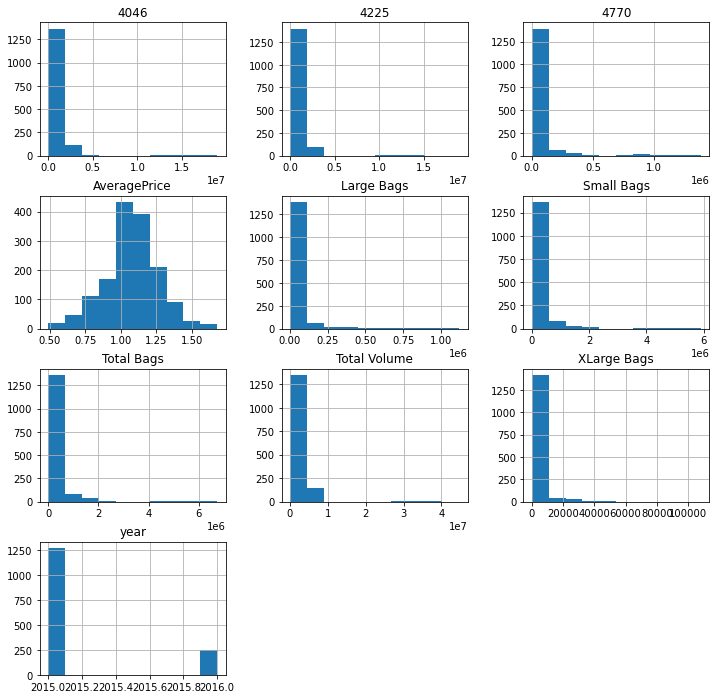

In [60]:
df.hist(figsize=(12,12));

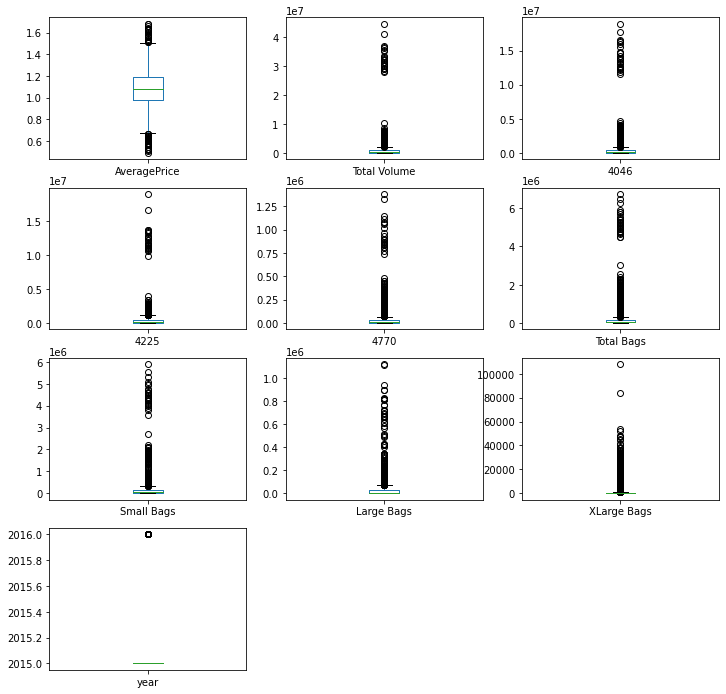

In [61]:
df.plot(kind='box', subplots=True, layout=(4,3),figsize=(12,12));

with thee help of box plot we can look for outliers in our dataset but it seems there are no major outliers present in dataset

In [62]:
Sold = pd.DataFrame(df,columns=['4046','4225','4770'])
sum_sold = Sold.sum(axis=0)
print (sum_sold)

4046    9.806474e+08
4225    9.275507e+08
4770    7.646514e+07
dtype: float64


here we are seeing total sales of avacado according to 4046,4225 and 4770

In [63]:
Bags = pd.DataFrame(df,columns=['Small Bags','Large Bags','XLarge Bags'])
sum_bags = Bags.sum(axis=0)
print (sum_bags)

Small Bags     3.773895e+08
Large Bags     6.468799e+07
XLarge Bags    3.309747e+06
dtype: float64


Here we can see that which bags are mostly use for Avocado and Large bag has maximum numbers here

In [64]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


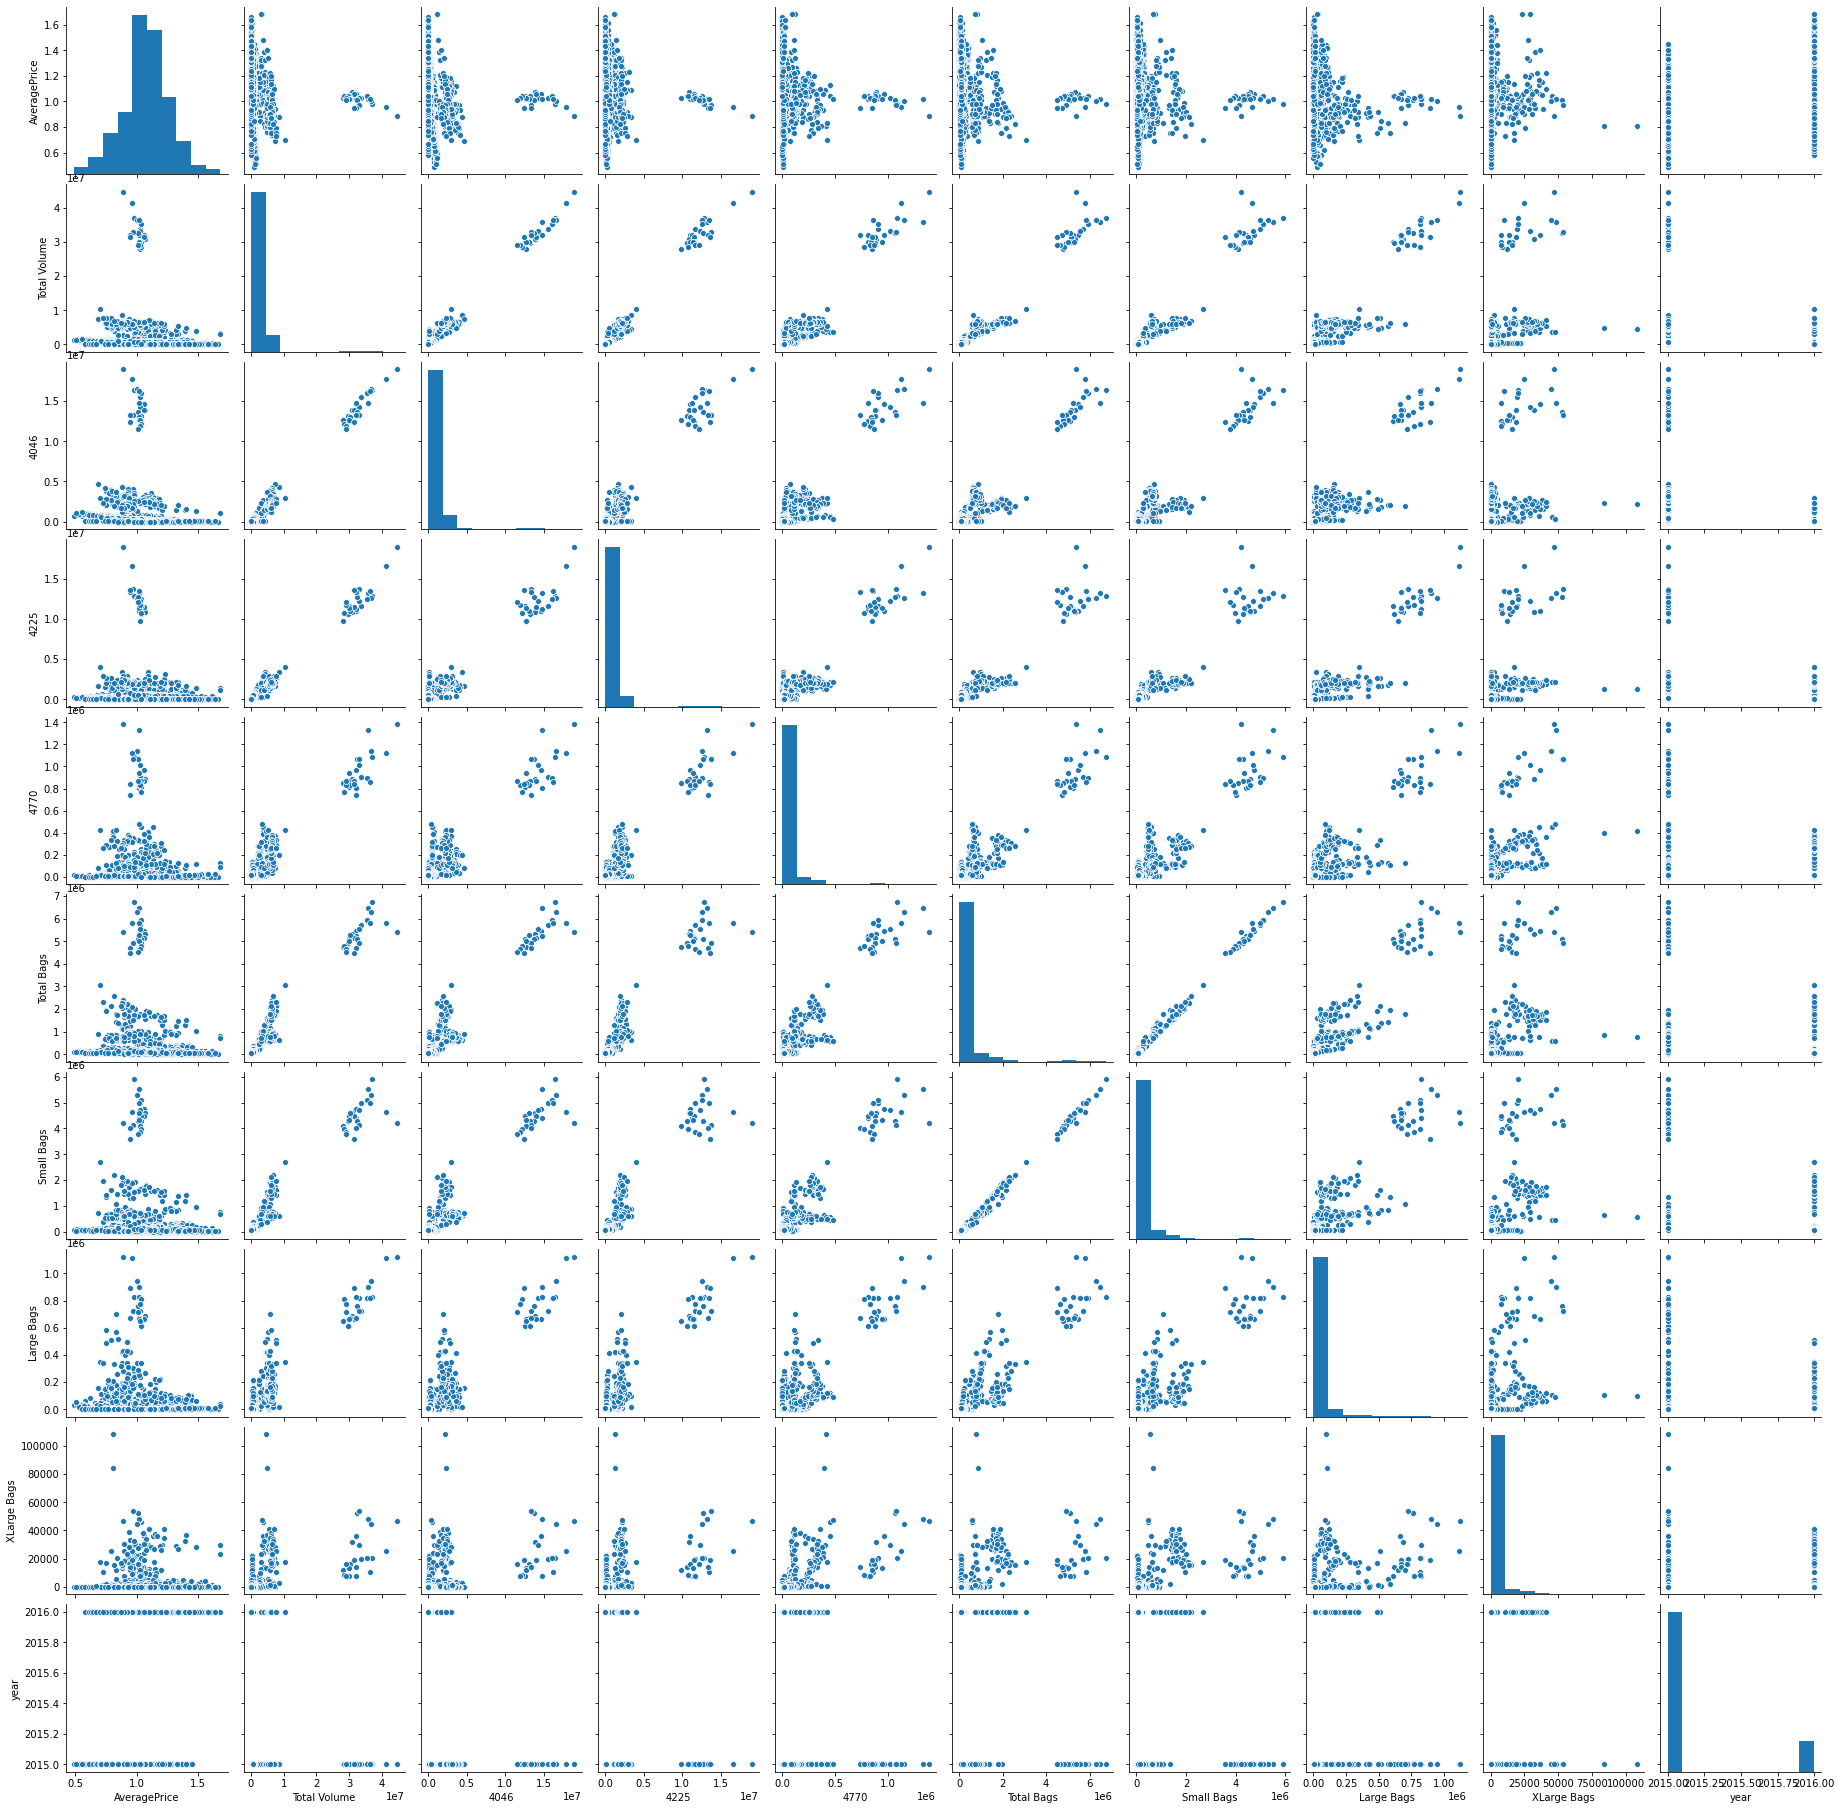

In [65]:
sns.pairplot(df)

with the help of pairplot we can see the correlation among all attributes with respect of Avrage price

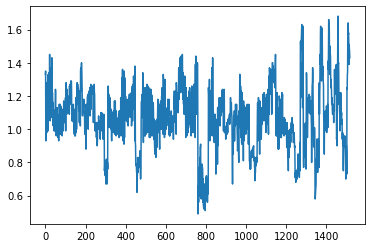

In [66]:
df['AveragePrice'].plot()

we can see here haw Avrage Price of Avocado fluctuate

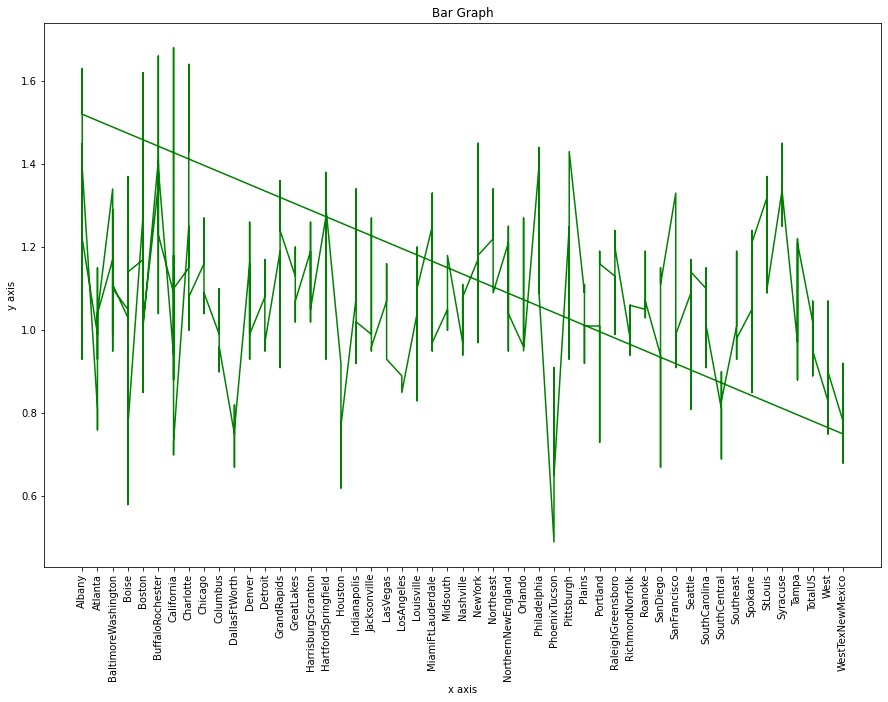

In [67]:
plt.figure(figsize=(15,10))
plt.plot(df['region'],df['AveragePrice'], color = 'g')
plt.title('Bar Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xticks(rotation = 90)

plt.show()

Above Graph help to understand region wise Avrage price of Avocado

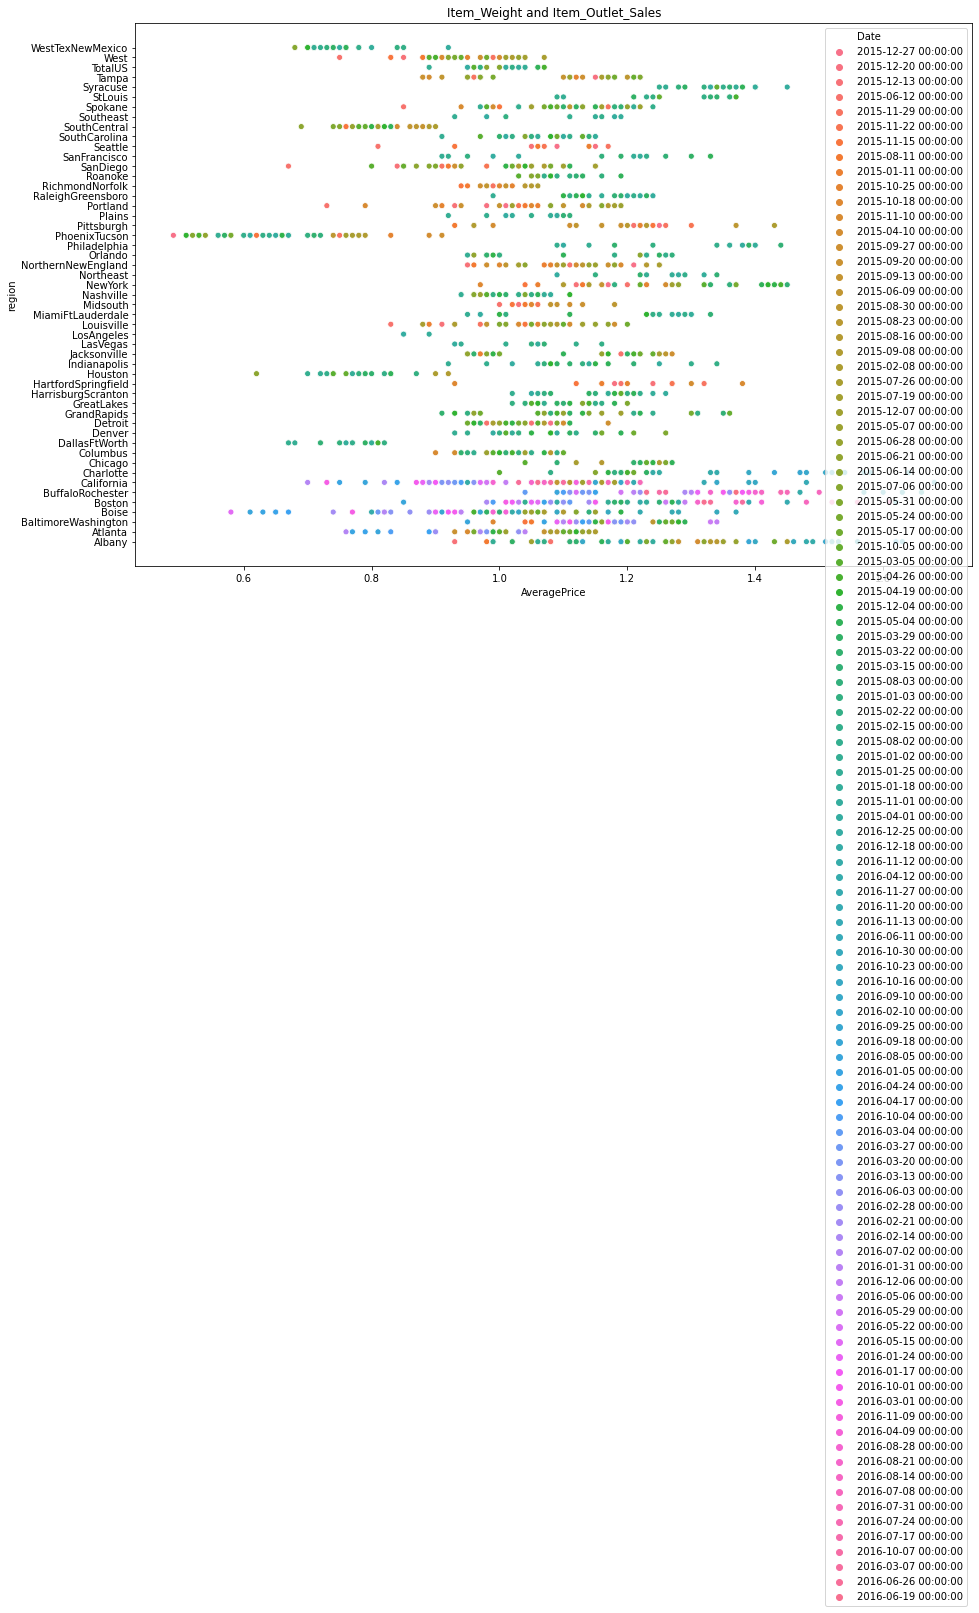

In [68]:
plt.figure(figsize=(15,10))
plt.xlabel('Average Price of Avocado')
plt.ylabel('Region of America')
plt.title('Item_Weight and Item_Outlet_Sales')
sns.scatterplot(x='AveragePrice',y='region',hue='Date',data=df)

In above Scatterpot we can see the relation between Avrage price and region with respect to date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

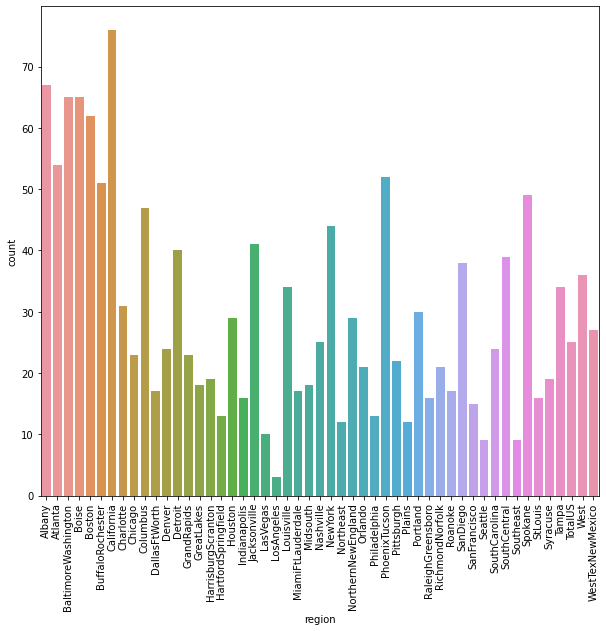

In [69]:
plt.figure(figsize=(10,9))
sns.countplot(df.region)
plt.xticks(rotation=90)

In above graph we can visualise that above california has maximum counts followed by Albany also LosVegas have minimum counts

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 205.9+ KB


In [71]:
label=LabelEncoder()
varib = ['Date','type','region']
for i in varib:
    df[i]=label.fit_transform(df[i])

here we use Label Encoder to change data types of few columns

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int64  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   int32  
 11  year          1517 non-null   float64
 12  region        1517 non-null   int32  
dtypes: float64(10), int32(2), int64(1)
memory usage: 194.1 KB


In [73]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0
3,22,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0
4,46,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,93,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7
1513,87,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7
1514,56,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7
1515,89,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7


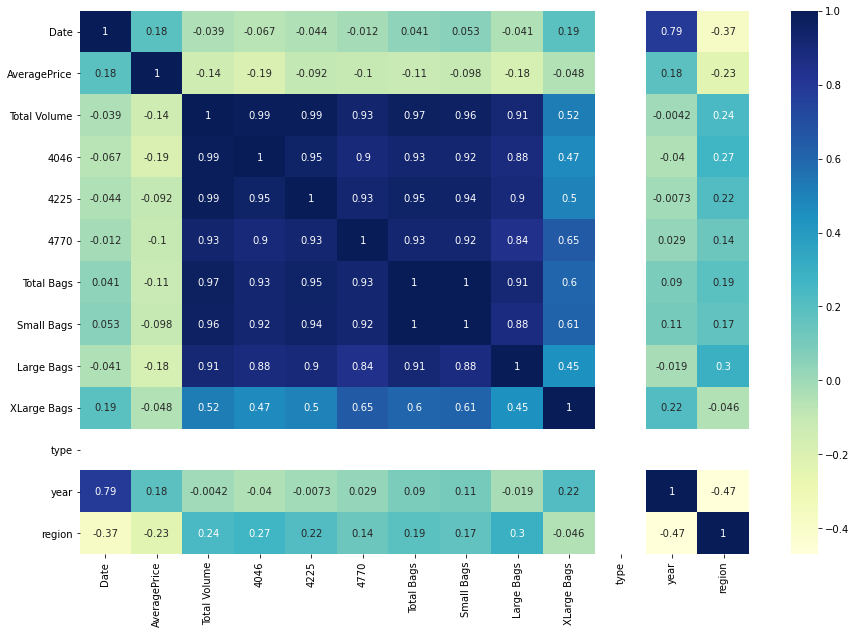

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmax=1,cmap='YlGnBu',annot=True)
plt.show()

here we can see correlation among all attributes
where we can see small bags, 4225,4046 have maximum positive correlation

In [75]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.184893,-0.039248,-0.066611,-0.044059,-0.012054,0.041042,0.053390,-0.041157,0.188593,NaN,0.789268,-0.374186
AveragePrice,0.184893,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,-0.039248,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,-0.066611,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,-0.044059,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,-0.012054,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.041042,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.053390,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,-0.041157,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,0.188593,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


Here we can see correlation among all attributes 
and we are seeing here NaN value in Type it is because type have only one Value which is Conventional

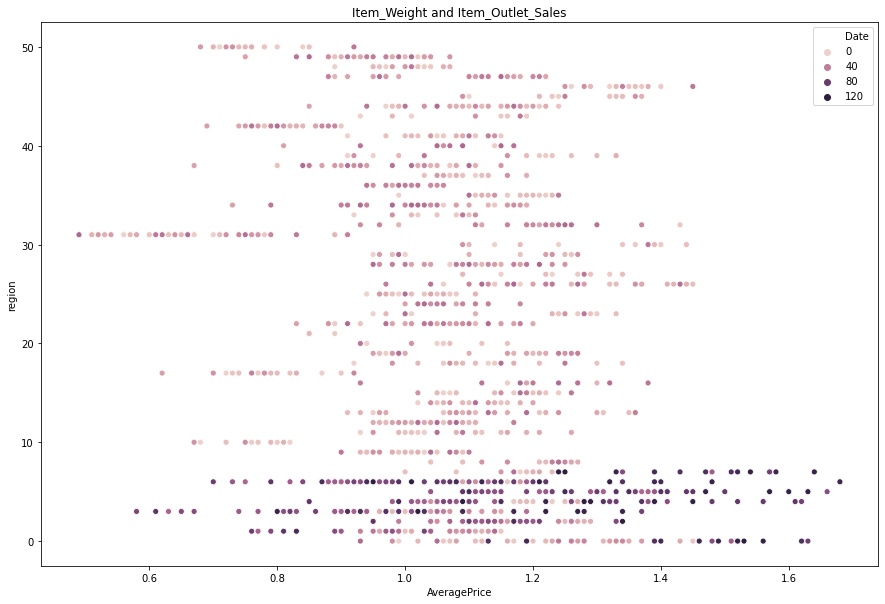

In [76]:
plt.figure(figsize=(15,10))
plt.xlabel('Average Price of Avocado')
plt.ylabel('Region of America')
plt.title('Item_Weight and Item_Outlet_Sales')
sns.scatterplot(x='AveragePrice',y='region',hue='Date',data=df)

Here again we can see Average price with according to regionn with respect to date which is now showing us year wise distribution oof price

In [77]:
y = df['AveragePrice']
x = df.drop('AveragePrice', axis=1)
df['AveragePrice']= df['AveragePrice']

In [78]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=43)
y_test.shape

(440,)

In [79]:
x_test.shape

(440, 12)

In [80]:
x_train.shape

(1077, 12)

In [81]:
y_train.shape

(1077,)

We Split data here in Training And Testing so we can perform Model testing

In [82]:
alpha_value={'alpha':[1,.1,.01,.001,.0001,0]}
model_test= Lasso()
grid=GridSearchCV(estimator=model_test, param_grid=alpha_value)

In [83]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.14150494631772398
0
{'alpha': 0}
/n


In [84]:
alpha_value1={'alpha':[1,.1,.01,.001,.0001,0]}
model_test1= Ridge()
grid=GridSearchCV(estimator=model_test1, param_grid=alpha_value1)

In [85]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.1417162829889808
0
{'alpha': 0}
/n


In [86]:
Min_Sample={'min_samples_leaf':[100,150,1000,1]}
model_test2= DecisionTreeRegressor()
grid=GridSearchCV(estimator=model_test2, param_grid=Min_Sample)

In [87]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [100, 150, 1000, 1]})
0.5183564156016008
1
{'min_samples_leaf': 1}
/n


We used Grid search here to use most appropriate Hyperparameter for our models

In [88]:

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[Ridge(alpha=0),LinearRegression(), Lasso(alpha=0, max_iter=50), DecisionTreeRegressor(max_depth=15,min_samples_leaf=1),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=50,n_jobs=4)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')
    

 Score = 
 Ridge(alpha=0) is :
0.18937424840085326
0.18702637413103518
0.032552108983661815


 Score = 
 LinearRegression() is :
0.18959102526981564
0.1872283535364042
0.03254402156802271


 Score = 
 Lasso(alpha=0, max_iter=50) is :
0.19260739120967452
0.190200179500436
0.03242502729861055


 Score = 
 DecisionTreeRegressor(max_depth=15) is :
0.5735945763588695
0.5735224146632223
0.017076500879266335


 Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_estimators=500,
                      n_jobs=4) is :
0.5500025912214559
0.5497887387731379
0.018026816091929163




In above we can see that Decision Tree Regressor is giving us more accurate result

we can not mae Classification model because there is only one type and that is Conventional

In [90]:
import joblib

In [93]:
joblib.dump(DecisionTreeRegressor(max_depth=15),'M20_P3_AvocadoP.obj')

['M20_P3_AvocadoP.obj']